In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from skbio import DistanceMatrix, TreeNode
from gneiss.plot._dendrogram import (Dendrogram, UnrootedDendrogram,
                                     SquareDendrogram)
from scipy.cluster.hierarchy import ward
import pandas.util.testing as pdt

In [5]:
np.random.seed(0)

# generate a random tree
x = np.random.rand(10)
dm = DistanceMatrix.from_iterable(x, lambda x, y: np.abs(x-y))
lm = ward(dm.condensed_form())  # hierarchical clustering
ids = np.arange(len(x)).astype(np.str)  # assign ids for each tip
tree = TreeNode.from_linkage_matrix(lm, ids) # create the tree

In [6]:
print(tree.ascii_art())

                    /-7
          /--------|
         |          \-8
         |
         |                    /-9
---------|          /--------|
         |         |         |          /-4
         |         |          \--------|
         |         |                    \-6
          \--------|
                   |                    /-0
                   |          /--------|
                   |         |          \-3
                    \--------|
                             |          /-1
                              \--------|
                                       |          /-2
                                        \--------|
                                                  \-5


In [9]:
# initialize tree with branch length and named internal nodes
for i, n in enumerate(tree.postorder(include_self=True)):
    n.length = 1
    if not n.is_tip():
        n.name = "y%d" % i

In [10]:
print(tree.ascii_art())

                    /-7
          /y2------|
         |          \-8
         |
         |                    /-9
-y18-----|          /y7------|
         |         |         |          /-4
         |         |          \y6------|
         |         |                    \-6
          \y17-----|
                   |                    /-0
                   |          /y10-----|
                   |         |          \-3
                    \y16-----|
                             |          /-1
                              \y15-----|
                                       |          /-2
                                        \y14-----|
                                                  \-5


In [11]:
t = UnrootedDendrogram.from_tree(tree)

In [12]:
res = t.coords(500, 500)

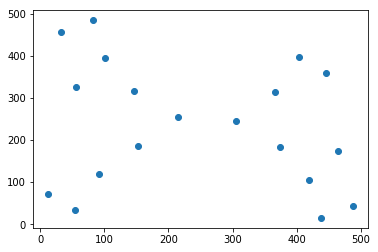

In [14]:
plt.scatter(res.x, res.y)

In [16]:
edges = res[['child0', 'child1']]
edges = edges.dropna(subset=['child0', 'child1'])
edges = edges.unstack()
edges = pd.DataFrame({'src_node': edges.index.get_level_values(1),
                      'dest_node': edges.values})

In [31]:
res[['child0', 'child1']].dropna()

,child0,child1
y10,0,3
y14,2,5
y15,1,y14
y16,y10,y15
y17,y7,y16
y18,y2,y17
y2,7,8
y6,4,6
y7,9,y6


In [32]:
res[['child0', 'child1']].dropna().unstack()

child0  y10      0
        y14      2
        y15      1
        y16    y10
        y17     y7
        y18     y2
        y2       7
        y6       4
        y7       9
child1  y10      3
        y14      5
        y15    y14
        y16    y15
        y17    y16
        y18    y17
        y2       8
        y6       6
        y7      y6
dtype: object

In [47]:
edge_list = []
for i in edges.index:
    src = edges.loc[i, 'src_node']
    dest = edges.loc[i, 'dest_node']
    sx, sy = res.loc[src].x, res.loc[src].y
    dx, dy = res.loc[dest].x, res.loc[dest].y

    edge_list.append(
        {'x0': sx, 'y0': sy, 'x1': dx, 'y1': dy}
    )
    #edge_list.append(
    #    {'x0': sx, 'y0': dy, 'x1': dx, 'y1': dy}
    #)
edge_list = pd.DataFrame(edge_list)

In [48]:
edge_list.head()

,x0,x1,y0,y1
0,366.836798,404.097405,313.290659,396.979353
1,419.421483,487.500000,104.578527,43.280355
2,373.617143,464.723981,183.913971,174.338256
3,305.538626,366.836798,245.212143,313.290659
4,214.431788,146.353271,254.787857,316.086029


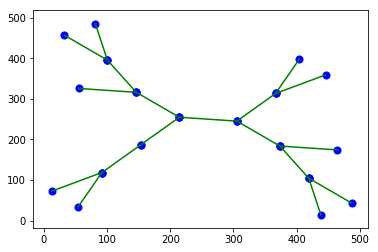

In [57]:
offset = 0.5
for i in range(len(edge_list.index)):
    row = edge_list.iloc[i]
    plt.plot([row.x0, row.x1],
             [row.y0, row.y1], '-g')
    plt.scatter([row.x0], [row.y0], c='b', s=50)
    plt.scatter([row.x1], [row.y1], c='b', s=50)

Todo

1) Make y10 size 100 and red

2) Make edges (y14, 2) and (y14, 5) orange with edge width 5


In [ ]:
def plot_this(tree, edge_attributes, node_attributes):
    """ Function to actually make the visualization
    
    Parameters
    ----------
    tree : skbio.TreeNode
        Tree to visualize
    node_attributes : pd.DataFrame
        Attributes to color for nodes
    edge_attributes : pd.DataFrame
        Attributes to color for edges
        
    TODO
    ----
    defaults : what if the node / edge attribute is not specified
    """

In [58]:
res

,x,y,child0,child1,is_tip
0,404.097,396.979,NaN,NaN,True
1,464.724,174.338,NaN,NaN,True
2,487.5,43.2804,NaN,NaN,True
3,446.172,359.095,NaN,NaN,True
4,32.4704,456.72,NaN,NaN,True
5,438.468,14.9717,NaN,NaN,True
6,81.5024,485.028,NaN,NaN,True
7,54.5748,34.9421,NaN,NaN,True
8,12.5,72.8265,NaN,NaN,True
9,55.2464,325.662,NaN,NaN,True


In [46]:
row

x0    146.353271
x1    100.548931
y0    395.421473
y1    395.421473
Name: 35, dtype: float64

In [50]:
for i, n in enumerate(t.postorder(include_self=True)):
    if not n.is_tip():
        n.name = "y%d" % i
        n.color = '#FF999F'
        n.edge_color = '#FF0000'
        n.node_size = 10
    else:
        n.color = '#1C9099'
        n.edge_color = '#00FF00'
        n.node_size = 10
        n.length = np.random.rand()*3
        n.edge_width = 2

In [53]:
print(tree.find('y7').ascii_art())

          /-9
-y7------|
         |          /-4
          \y6------|
                    \-6
